In [15]:
import cooler
import cooltools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from coolpuppy import coolpup, plotpup
from script import main_func

In [2]:
position = 'chr1'
path = '../../5AB.filtered.mcool'
resolution = 2000

### Run function: OPTICS

INFO:coolpuppy:('chr1', 'chr1'): 181
INFO:coolpuppy:Total number of piled up windows: 181


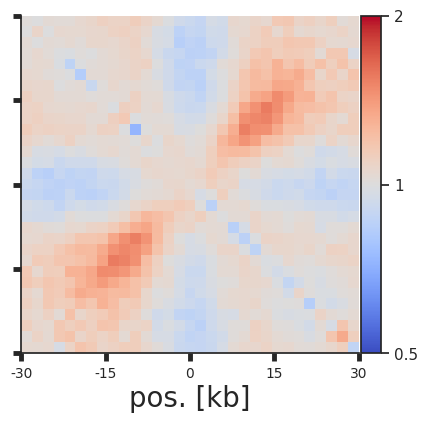

In [3]:
pileup, coords = main_func(path, resolution, position, cluster_method='optics', end_bin=25, quantile_threshold=0.98, fdr_correction=0.05, qval_threshold=0.4)

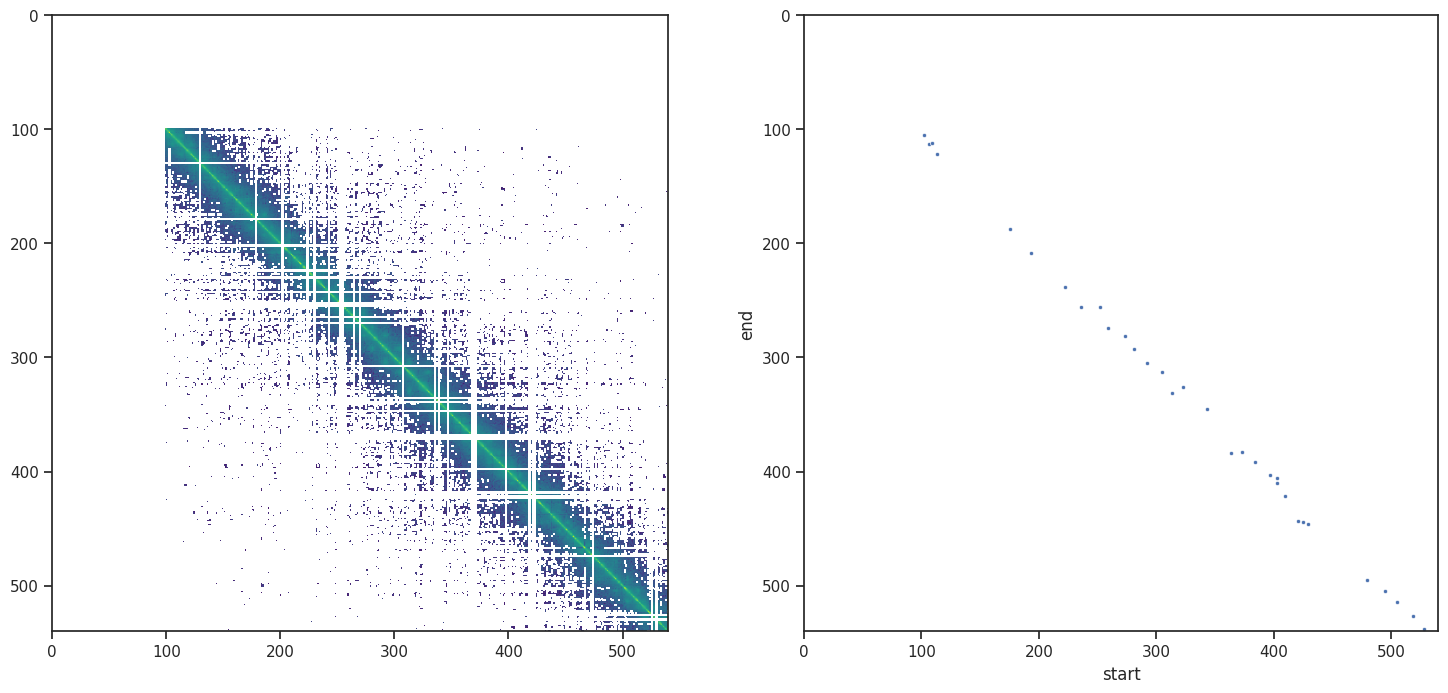

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
coords_bins = coords[['end', 'start']]//2000
scatter = sns.scatterplot(x = coords_bins['start'],
                    y = coords_bins['end'],
                    palette = "colorblind", marker='.', s = 35, ax = axes[1])
ax = scatter.axes
ax.set_xlim([0, 540])
ax.set_ylim([0, 540])
ax.invert_yaxis()

mtx_name_for_cooler = path + '::/resolutions/' + str(2000)
hic = cooler.Cooler(mtx_name_for_cooler).matrix(balance = True, sparse = False).fetch(position)
axes[0].imshow(np.log(hic), cmap='viridis')
axes[0].set_xlim([0, 540])
axes[0].set_ylim([540, 0])
None

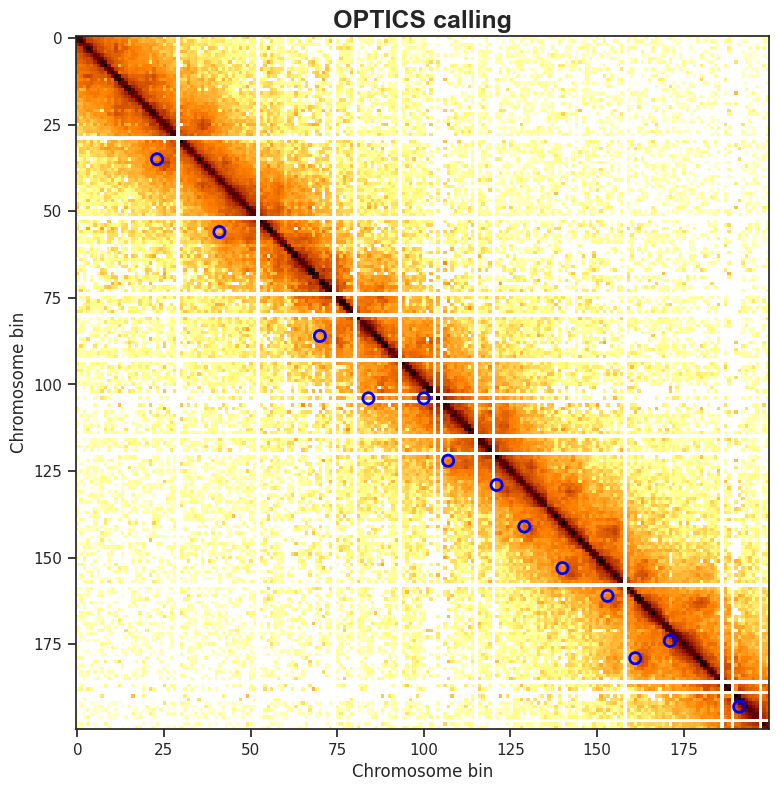

In [5]:
loops_coords_bed = coords.query('start >= 300000 and end <= 700000')
loops_coords_bed = loops_coords_bed[['start', 'end']] = loops_coords_bed[['start', 'end']].apply(lambda x: (x//resolution)-152)
position = 'chr1:300000-700000'
mtx_name_for_cooler = path + '::/resolutions/' + str(2000)
hic = cooler.Cooler(mtx_name_for_cooler).matrix(balance = True, sparse = False).fetch(position)
fig = plt.figure(figsize=(9, 9))
plt.imshow(np.log10(hic), cmap='afmhot_r', vmax = 0.05)
plt.scatter(loops_coords_bed['start'], loops_coords_bed['end'], edgecolors='blue', facecolors='none', label='loops', s = 65, lw=2)
plt.xlabel('Chromosome bin', fontsize = 12)
plt.ylabel('Chromosome bin', fontsize = 12)
plt.title('OPTICS calling', fontsize = 18, fontweight = 'bold', fontfamily = 'sans-serif')
None

### Run function: DBSCAN

INFO:coolpuppy:('chr1', 'chr1'): 185
INFO:coolpuppy:Total number of piled up windows: 185


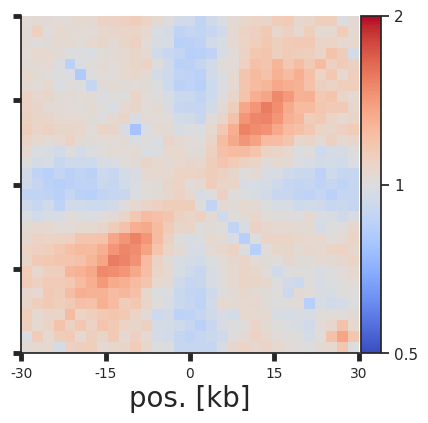

In [6]:
position = 'chr1'
path = '../../5AB.filtered.mcool'
resolution = 2000
pileup, coords = main_func(path, resolution, position, end_bin=25, quantile_threshold=0.98, fdr_correction=0.05, qval_threshold=0.4)

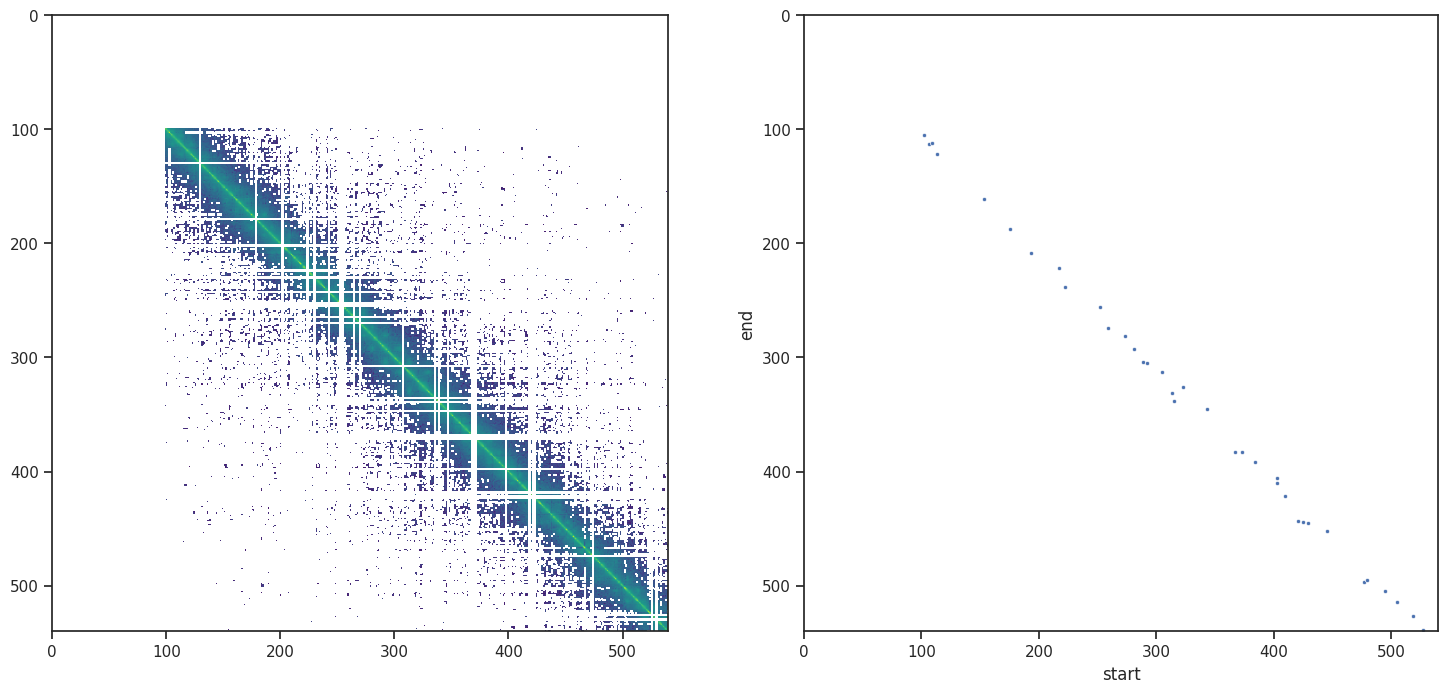

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
coords_bins = coords[['end', 'start']]//2000
scatter = sns.scatterplot(x = coords_bins['start'],
                    y = coords_bins['end'],
                    palette = "colorblind", marker='.', s = 35, ax = axes[1])
ax = scatter.axes
ax.set_xlim([0, 540])
ax.set_ylim([0, 540])
ax.invert_yaxis()

mtx_name_for_cooler = path + '::/resolutions/' + str(2000)
hic = cooler.Cooler(mtx_name_for_cooler).matrix(balance = True, sparse = False).fetch(position)
axes[0].imshow(np.log(hic), cmap='viridis')
axes[0].set_xlim([0, 540])
axes[0].set_ylim([540, 0])
None

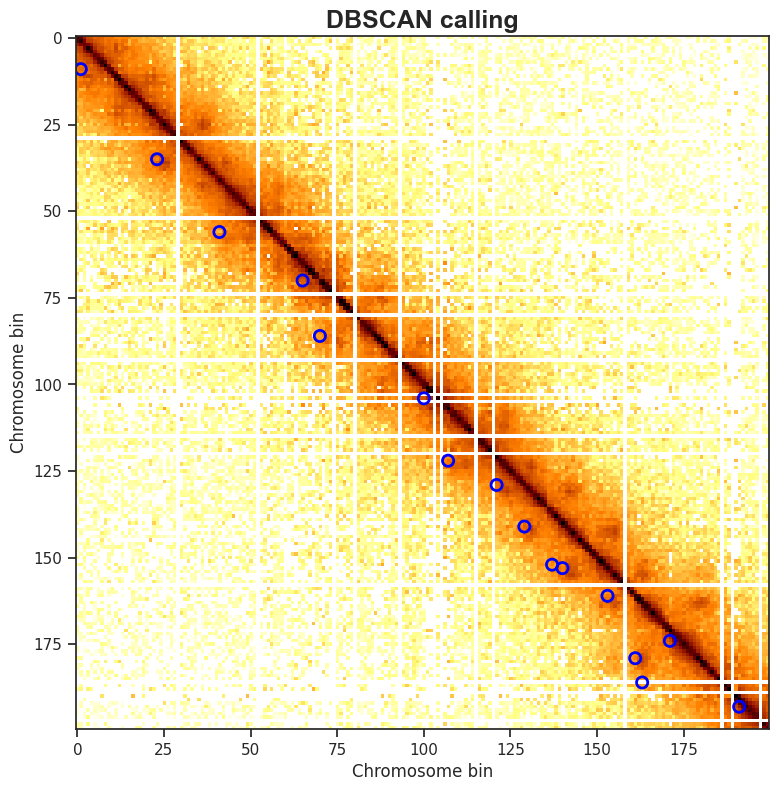

In [8]:
loops_coords_bed = coords.query('start >= 300000 and end <= 700000')
loops_coords_bed = loops_coords_bed[['start', 'end']] = loops_coords_bed[['start', 'end']].apply(lambda x: (x//resolution)-152)
position = 'chr1:300000-700000'
mtx_name_for_cooler = path + '::/resolutions/' + str(2000)
hic = cooler.Cooler(mtx_name_for_cooler).matrix(balance = True, sparse = False).fetch(position)
fig = plt.figure(figsize=(9, 9))
plt.imshow(np.log10(hic), cmap='afmhot_r', vmax = 0.05)
plt.scatter(loops_coords_bed['start'], loops_coords_bed['end'], edgecolors='blue', facecolors='none', label='loops', s = 65, lw=2)
plt.xlabel('Chromosome bin', fontsize = 12)
plt.ylabel('Chromosome bin', fontsize = 12)
plt.title('DBSCAN calling', fontsize = 18, fontweight = 'bold', fontfamily = 'sans-serif')
None

### Reference coordinates

INFO:coolpuppy:('chr1', 'chr1'): 32
INFO:coolpuppy:Total number of piled up windows: 32


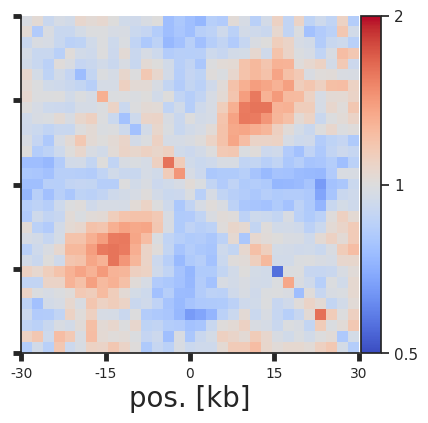

In [16]:
headers = ['chrom1', 'start1','end1', 'chrom2', 'start2', 'end2']
bedpe_df = pd.read_csv('0AB_loops_leftFlames0.8.bedpe', sep = '\t')
bedpe_df = bedpe_df.set_axis(headers, axis=1)
bedpe_df = bedpe_df.query('chrom1 == "chr1"')
bedpe_df = bedpe_df[['chrom1', 'start1', 'end2']]
headers2 = ['chrom', 'start','end']
bedpe_df = bedpe_df.set_axis(headers2, axis=1)

path = '../../5AB.filtered.mcool'
resolution = 2000

mtx_name_for_cooler = path + '::/resolutions/' + str(resolution)
hic = cooler.Cooler(mtx_name_for_cooler)

expected = cooltools.expected_cis(
    hic,
    ignore_diags=0,
    chunksize=1000000)

pup = coolpup.pileup(hic, bedpe_df, features_format='bed', expected_df=expected, local=True, nshifts=10,
                        flank=30_000, min_diag=0)

plotpup.plot(pup,
             score=False, cmap='coolwarm', scale='log',
             sym=True, vmax=2,
             height=5, plot_ticks=True)
None